**Import Python Preliminaries**

In [5]:

import sys

sys.path[0] = '/bbkinghome/mbarrera/git_supply/nndp/src'

import sys
import pandas as pd
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optax
import nndp
#import nndp
#from nndp import train, simulate

**Import Functions and Model Parameters from Income Fluctuations Example**

In [6]:
from model import u, m, F, policy, T

**Initialize Policy Function**

In [7]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
params, nn = nndp.initialize_deep_nn(subkey,
                                n_states = 3,
                                n_actions = 1,
                                nodes_per_layer=128,
                                hidden_layers=4,
                                hidden_activation=jax.nn.tanh,
                                output_activation=[jax.nn.sigmoid])


**Train Policy Function**

In [10]:
key, subkey = jax.random.split(key)

params = nndp.core.train(key = subkey,
               params = params,
               nn = nn,
               policy = policy,
               u = u,
               m = m,
               F = F,
               T = T,
               N_simul = 1,
               batch_size = 250,
               N_iter = 100,
               optimizer = optax.adam(1e-3)
               )

Objective value on training iteration 99 out of 100: -87.59902191162119

**Plot Policy Function**

/tmp/ipykernel_277997/1757093029.py:6: DeprecationWarning: column_stack requires ndarray or scalar arguments, got <class 'list'> at position 0. In a future JAX release this will be an error.
  s = jnp.column_stack(([t] * len(a), [y_plot] * len(a), a))
/tmp/ipykernel_277997/1757093029.py:6: DeprecationWarning: column_stack requires ndarray or scalar arguments, got <class 'list'> at position 0. In a future JAX release this will be an error.
  s = jnp.column_stack(([t] * len(a), [y_plot] * len(a), a))


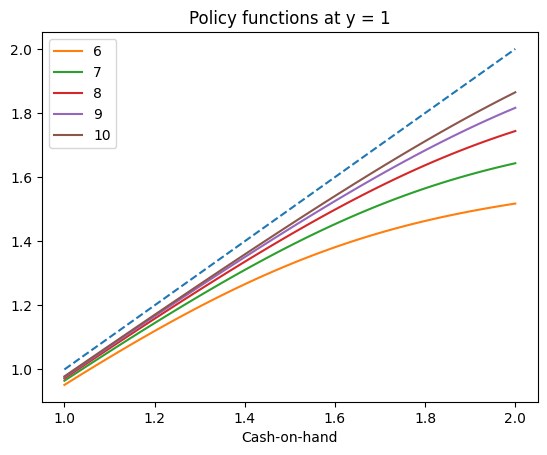

In [11]:
a = jnp.linspace(0,1)
y_plot = 1
fig, ax = plt.subplots()
ax.plot(a + y_plot, a + y_plot, ls = '--')
for t in range(T-4, T+1):
    s = jnp.column_stack(([t] * len(a), [y_plot] * len(a), a))
    ax.plot(a + y_plot, policy(s, params, nn), label = f'{t}')
ax.legend()
ax.set(xlabel='Cash-on-hand')
ax.set(title=f'Policy functions at y = {y_plot}')
plt.show()

**Simulate Paths of Individuals Given Policy Function**

In [6]:
s0 = F(key = key, N = 100)
results = simulate(key = key,
                   policy = policy,
                   params = params,
                   u = u,
                   m = m,
                   s0 = s0,
                   T = T)
results = pd.DataFrame(results, columns = ['id', 't', 'y', 'a', 'c', 'v'])
results.to_csv('simulation_results.csv', index = False)